In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display

In [2]:
data = pd.read_csv('mumbai_19_23.csv',parse_dates =["date"])
data.head()

,City,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,SR,BP,Xylene,AT,RF,TOT-RF,date,day,month,year
0,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,2019-01-06,1,6,2019
1,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,2019-02-06,2,6,2019
2,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,2019-03-06,3,6,2019
3,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,2019-04-06,4,6,2019
4,Mumbai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,2019-05-06,5,6,2019


In [3]:
# drop the unwanted columns/features
cols_to_drop = ['City','Toluene','RF','Xylene','TOT-RF']
data = data.drop(cols_to_drop,axis=1)
# print out the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PM2_5        1324 non-null   float64       
 1   PM10         1289 non-null   float64       
 2   NO           1338 non-null   float64       
 3   NO2          1308 non-null   float64       
 4   NOx          1347 non-null   float64       
 5   NH3          1239 non-null   float64       
 6   SO2          1320 non-null   float64       
 7   CO           1326 non-null   float64       
 8   Ozone        1317 non-null   float64       
 9   Benzene      1327 non-null   float64       
 10  Eth-Benzene  1247 non-null   float64       
 11  MP-Xylene    1248 non-null   float64       
 12  RH           1343 non-null   float64       
 13  WS           1343 non-null   float64       
 14  WD           1343 non-null   float64       
 15  SR           1334 non-null   float64       
 16  BP    

In [4]:
# check for duplicated values and null values
print('Are there any duplicated values in our data ? : {}\n'.format(data.duplicated().any()))
print('The total number of null values in each colum:')
display(data.isnull().sum())

Are there any duplicated values in our data ? : False

The total number of null values in each colum:


PM2_5           76
PM10           111
NO              62
NO2             92
NOx             53
NH3            161
SO2             80
CO              74
Ozone           83
Benzene         73
Eth-Benzene    153
MP-Xylene      152
RH              57
WS              57
WD              57
SR              66
BP             999
AT              59
date             0
day              0
month            0
year             0
dtype: int64

In [5]:
# fill in the missing values with the mean of the particular column
data.fillna(value=data.mean(),inplace=True)
# let's check the data again if there are any missing values
data.isnull().any()

PM2_5          False
PM10           False
NO             False
NO2            False
NOx            False
NH3            False
SO2            False
CO             False
Ozone          False
Benzene        False
Eth-Benzene    False
MP-Xylene      False
RH             False
WS             False
WD             False
SR             False
BP             False
AT             False
date           False
day            False
month          False
year           False
dtype: bool

In [6]:
data.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,...,RH,WS,WD,SR,BP,AT,date,day,month,year
0,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,...,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645,2019-01-06,1,6,2019
1,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,...,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645,2019-02-06,2,6,2019
2,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,...,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645,2019-03-06,3,6,2019
3,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,...,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645,2019-04-06,4,6,2019
4,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,...,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645,2019-05-06,5,6,2019


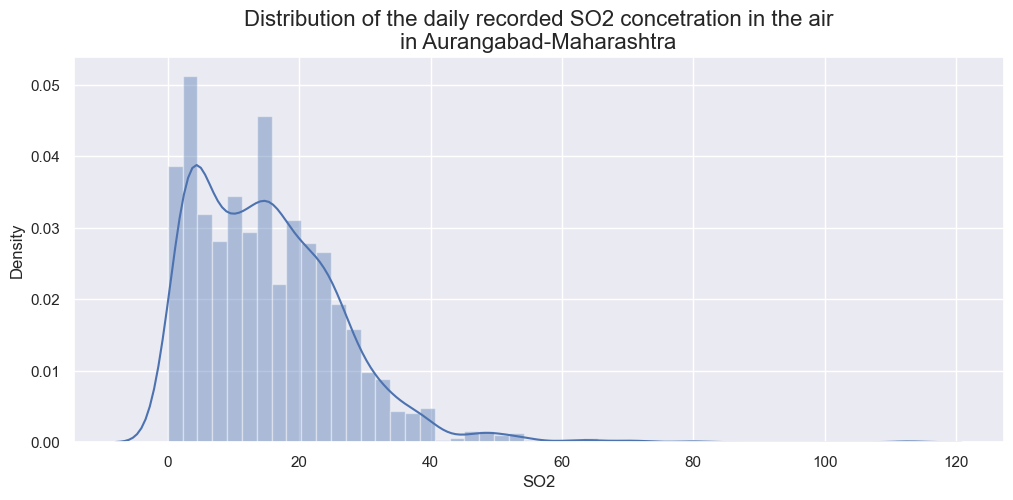

In [7]:
plt.figure(figsize=(12,5))
sns.distplot(data['SO2'],bins=50)
plt.title('Distribution of the daily recorded SO2 concetration in the air\nin Aurangabad-Maharashtra',
          fontsize=16)
plt.show()

In [8]:
import pandas as pd
import numpy as np

months = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']

# convert 'month' column to categorical variable with specified category order
monthly_data = data[['month','SO2']]
#monthly_data['month'] = pd.Categorical(monthly_data['month'], categories=months, ordered=True)

# calculate monthly median of 'PM2_5'
monthly_average = monthly_data.groupby('month')['SO2'].median()

# round the values to one decimal place
monthly_average = np.round(monthly_average, 1)

# convert the resulting Series to a DataFrame
monthly_average = pd.DataFrame(monthly_average)

# set the index to the categorical variable and rename the column
monthly_average.index.name = 'month'
monthly_average.columns = ['median_SO2']

# display the resulting DataFrame
print(monthly_average)

       median_SO2
month            
1            16.9
2            17.1
3            15.2
4             5.8
5            12.6
6             9.2
7             8.7
8            12.1
9            10.2
10           13.7
11           17.8
12           17.0


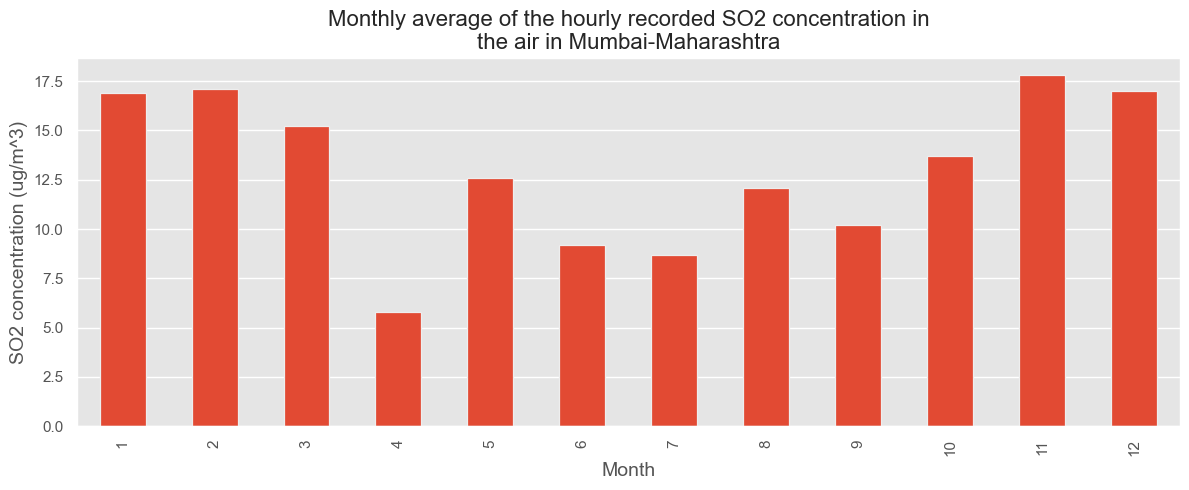

In [9]:
# plot the data
with plt.style.context('ggplot'):
    monthly_average.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('SO2 concentration (ug/m^3)',fontsize=14)
    plt.title('Monthly average of the hourly recorded SO2 concentration in\nthe air in Mumbai-Maharashtra',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

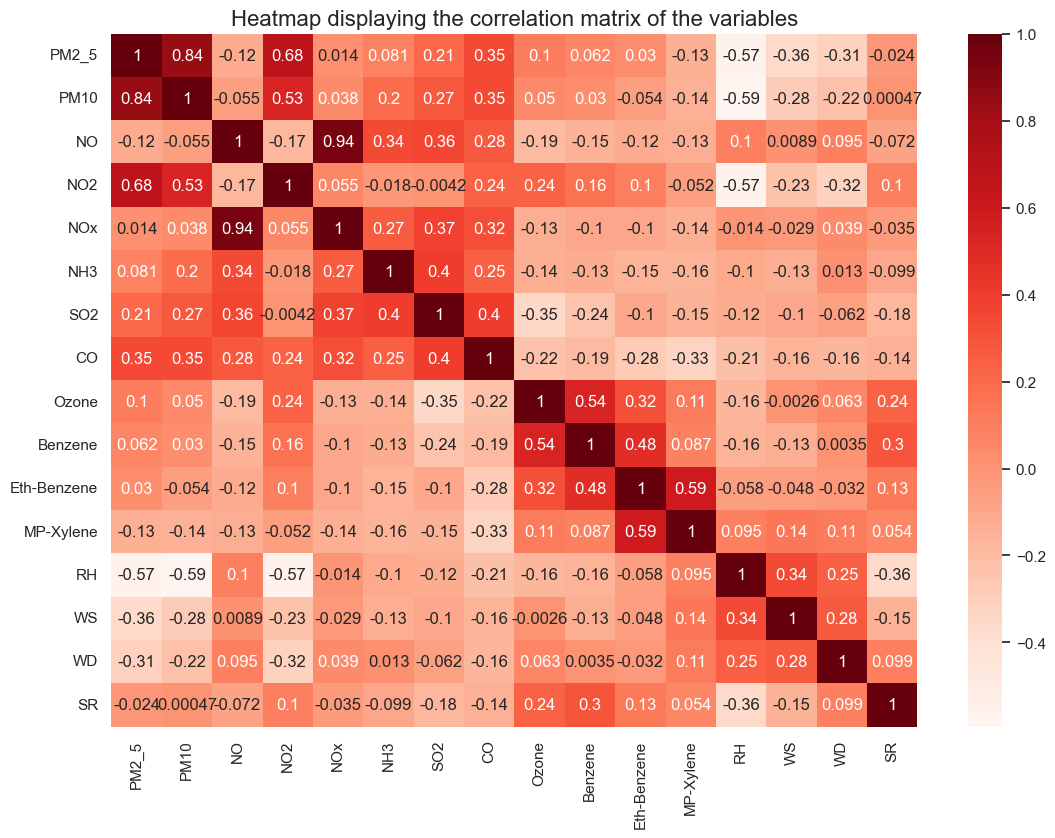

In [27]:
# let's try and visualize the relationships between the features of the data
plt.figure(figsize=(13,9))
correlation_data = data[['PM2_5', 'PM10', 'NO', 'NO2',
                         'NOx', 'NH3', 'SO2', 'CO',
                         'Ozone', 'Benzene','Eth-Benzene','MP-Xylene','RH','WS','WD','SR']]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

In [28]:
cols_to_drop = ['date','year','month','day']
newdata = data.drop(cols_to_drop,axis=1)

# calculate the variance inflation factor of each feature and detect multicollinearity
cons_data = sm.tools.add_constant(newdata)
series_before = pd.Series([variance_inflation_factor(cons_data.values,i) for i in range(cons_data.shape[1])],
                         index=cons_data.columns)
series_before

const          233566.520396
PM2_5               5.476482
PM10                4.580568
NO                 17.991610
NO2                 3.919553
NOx                17.188253
NH3                 1.479062
SO2                 1.900062
CO                  1.745204
Ozone               1.752062
Benzene             1.964903
Eth-Benzene         2.359971
MP-Xylene           1.890234
RH                  2.940956
WS                  1.431679
WD                  1.670987
SR                  1.510242
BP                  1.843380
AT                  2.112211
dtype: float64

In [29]:
newdata.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Eth-Benzene,MP-Xylene,RH,WS,WD,SR,BP,AT
0,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,9.041395,17.748293,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645
1,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,9.041395,17.748293,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645
2,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,9.041395,17.748293,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645
3,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,9.041395,17.748293,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645
4,43.72923,93.78294,40.707444,17.742699,56.962205,19.993761,15.237295,0.719548,12.422893,3.787438,9.041395,17.748293,78.124624,1.110216,199.205845,224.834768,1006.228753,27.03645


In [30]:
columns_to_drop = ['RH','WS','WD','SR',]

newdata = newdata.drop(columns_to_drop,axis=1)
cons_data2 = sm.tools.add_constant(newdata)
series_after = pd.Series([variance_inflation_factor(cons_data2.values,i) for i in range(cons_data2.shape[1])],
                         index=cons_data2.columns)
series_after

const          175611.394439
PM2_5               5.065547
PM10                3.970393
NO                 17.980553
NO2                 3.383898
NOx                17.163153
NH3                 1.455216
SO2                 1.830626
CO                  1.695953
Ozone               1.661265
Benzene             1.910495
Eth-Benzene         2.325150
MP-Xylene           1.867294
BP                  1.439417
AT                  1.287896
dtype: float64

In [31]:
newdata.columns = ['PM2_5','PM10','NO','NO2','NOx','NH3','SO2','CO','Ozone','O','Benzene','Toluene','Eth_Benzene','MP_Xylene']

# PM2.5 is skewed to the right so we log transform the values to normalize the distribution
newdata['SO2'] = np.log(newdata['SO2'])

In [32]:
mul_reg = formula.ols(formula="SO2 ~ PM10  + NO + NO2 + PM2_5 + NH3 + NOx + CO + Ozone + O + Benzene + Toluene + Eth_Benzene + MP_Xylene",
                      data=newdata).fit()
mul_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SO2   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     65.43
Date:                Wed, 19 Apr 2023   Prob (F-statistic):          7.16e-134
Time:                        00:57:42   Log-Likelihood:                -1652.1
No. Observations:                1400   AIC:                             3332.
Df Residuals:                    1386   BIC:                             3406.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      50.1237      8.711      5.754      0.000      33.035      67.212
PM10            0.0028      0.001      3.588      0.000       0.001       0.004
NO             -0.0027      0.001     -2.104      0.036      -0.005      -0.000
NO2            -0.0156      0.002     -6.356      0.000      -0.020      -0.011
PM2_5           0.0072      0.001      5.061      0.000       0.004       0.010
NH3             0.0037      0.001      6.691      0.000       0.003       0.005
NOx             0.0051      0.001      4.190      0.000       0.003       0.007
CO              0.4088      0.052      7.910      0.000       0.307       0.510
Ozone          -0.0124      0.002     -7.832      0.000      -0.016      -0.009
O              -0.0190      0.004     -4.811      0.000      -0.027      -0.011
Benzene         0.0687      0.006     10.972      0.000       0.056       0.081
Toluene        -0.0110      0.002     -4.870      0.000      -0.015      -0.007
Eth_Benzene    -0.0474      0.009     -5.485      0.000      -0.064      -0.030
MP_Xylene      -0.0407      0.012     -3.520      0.000      -0.063      -0.018
==============================================================================
Omnibus:                      693.142   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8349.207
Skew:                          -2.001   Prob(JB):                         0.00
Kurtosis:                      14.274   Cond. No.                     4.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
# we split the data into predictor variables and Outcome variable
X = newdata.drop('SO2',axis=1)
y = newdata['SO2']

# we need to scale or normalize the predictor variables since they are not on the same
# scale and some of their distributions are skewed.
X_scaled =  preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.dropna(inplace=True)
# print the scaled predictor variables.
X_scaled.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,CO,Ozone,O,Benzene,Toluene,Eth_Benzene,MP_Xylene
0,0.0,0.0,0.0,0.0,1.010406e-16,0.0,0.0,0.0,0.0,0.0,0.0,-3.936513e-14,-1.719031e-15
1,0.0,0.0,0.0,0.0,1.010406e-16,0.0,0.0,0.0,0.0,0.0,0.0,-3.936513e-14,-1.719031e-15
2,0.0,0.0,0.0,0.0,1.010406e-16,0.0,0.0,0.0,0.0,0.0,0.0,-3.936513e-14,-1.719031e-15
3,0.0,0.0,0.0,0.0,1.010406e-16,0.0,0.0,0.0,0.0,0.0,0.0,-3.936513e-14,-1.719031e-15
4,0.0,0.0,0.0,0.0,1.010406e-16,0.0,0.0,0.0,0.0,0.0,0.0,-3.936513e-14,-1.719031e-15


In [57]:
y.head()

0    2.723746
1    2.723746
2    2.723746
3    2.723746
4    2.723746
Name: SO2, dtype: float64

In [58]:
# Replace large values with a more reasonable value
y[np.isinf(y)] = np.nan
y[np.isnan(y)] = np.nanmean(y)

# we now split out data into train and test data

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

# instantiate the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)   # fit the model

LinearRegression()

In [59]:
# we now score the model
print('Score on train data: {}\n'.format(lin_model.score(X_train,y_train)))
print('Score on test data: {}'.format(lin_model.score(X_test,y_test)))

Score on train data: 0.37595167502510873

Score on test data: 0.3854702524859992


In [60]:
prediction = lin_model.predict(X_test)
mse = mean_squared_error(y_test,prediction)
accuracy = r2_score(y_test,prediction)

print('Mean Squared Error: {}\n'.format(mse))
print('Overall model accuracy: {}'.format(accuracy))

Mean Squared Error: 0.5658639330819604

Overall model accuracy: 0.3854702524859992


In [61]:
ensemble_data = data.drop(cols_to_drop,axis=1)

# we split the data into predictor variables and Outcome variable
X = ensemble_data.drop('SO2',axis=1)
y = ensemble_data['SO2']

In [62]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.3)

In [65]:
# we go ahead to use the ensemble methods as the LinearRegression model has a low accuracy
# on both the test and train data.
decision_tree = DecisionTreeRegressor(max_depth=5,
                                     max_features='auto',
                                     min_samples_split=3,
                                     min_samples_leaf=2)
decision_tree.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=2,
                      min_samples_split=3)

In [66]:
# we now score the model
print('Score on train data: {}\n'.format(decision_tree.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(decision_tree.score(xtest,ytest)))

tree_pred = decision_tree.predict(xtest)
tree_mse = mean_squared_error(ytest,tree_pred)
tree_accuracy = r2_score(ytest,tree_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_mse)))
print('Overall model accuracy: {}'.format(tree_accuracy))

Score on train data: 0.7022215777114946

Score on test data: 0.5981981206818567

Root Mean Squared Error: 7.253465387430518

Overall model accuracy: 0.5981981206818567


In [67]:
# We now tune the parameters of the model to see if we can increase the accuracy
params = {'max_depth':[3,4,5,6,7],
         'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9,10],
         'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}

tree = DecisionTreeRegressor()

# initialize the grid search for the best parameters
tree_search = GridSearchCV(tree,param_grid=params,
                          n_jobs=-1,cv=5)

tree_search.fit(xtrain,ytrain)   # fit the model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [43]:
# we now score the model
print('Score on train data: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(tree_search.score(xtest,ytest)))
print('Best parameters found:')
display(tree_search.best_params_)

tree_search_pred = tree_search.predict(xtest)
tree_search_mse = mean_squared_error(ytest,tree_search_pred)
tree_search_accuracy = r2_score(ytest,tree_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_search_mse)))
print('Overall model accuracy: {}'.format(tree_search_accuracy))

Score on train data: 0.8702965083550083

Score on test data: 0.8167071782519935

Best parameters found:


{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 7}

Root Mean Squared Error: 14.500183733974334

Overall model accuracy: 0.8167071782519935


In [68]:
dtpredicted=tree_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Decision_tree':dtpredicted.tolist()})
df.to_excel('decision_tree_SO2.xlsx')

In [69]:
# instantiate the RandomForestRegressor model and fit the model on the training data
forest = RandomForestRegressor(n_estimators=100,
                              max_depth=7,
                              max_features='auto',
                              min_samples_split=7,
                              min_samples_leaf=3)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=7, max_features='auto', min_samples_leaf=3,
                      min_samples_split=7)

In [70]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.8256196450322708

Score on test data: 0.7478501223830004

Root Mean Squared Error: 5.746043930394987

Overall model accuracy: 0.7478501223830004


In [71]:
# we now tune the parameters of the RandomForestRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['n_estimators'] = [100,200,300,400,500]

# instantiate the model
random_forest = RandomForestRegressor()

# perform the grid search for the best parameters
forest_search = RandomizedSearchCV(random_forest,params,n_jobs=-1,
                                   cv=5,verbose=2)
forest_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [72]:
# we now score the model
print('Score on train data: {}\n'.format(forest_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest_search.score(xtest,ytest)))
print('Best parameters found:')
display(forest_search.best_params_)

forest_search_pred = forest_search.predict(xtest)
forest_search_mse = mean_squared_error(ytest,forest_search_pred)
forest_search_accuracy = r2_score(ytest,forest_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_search_mse)))
print('Overall model accuracy: {}'.format(forest_search_accuracy))

Score on train data: 0.8266288912542712

Score on test data: 0.7450852048114603

Best parameters found:


{'n_estimators': 100,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 7}

Root Mean Squared Error: 5.777461796810689

Overall model accuracy: 0.7450852048114603


In [73]:
rfpredicted=forest_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from random_forest':rfpredicted.tolist()})
df.to_excel('randomforest_SO2.xlsx')

In [74]:
# instantiate the GradientBoostingRegressor model and fit the model on the training data
grad_boost = GradientBoostingRegressor(n_estimators=100,
                                      max_depth=7,
                                      max_features='auto',
                                      min_samples_split=7,
                                      min_samples_leaf=3,
                                      learning_rate=0.1)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(max_depth=7, max_features='auto', min_samples_leaf=3,
                          min_samples_split=7)

In [75]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.997126183471588

Score on test data: 0.775869778786441

Root Mean Squared Error: 5.4173858746621715

Overall model accuracy: 0.775869778786441


In [1]:
# we now tune the parameters of the GradientBoostingRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['learning_rate'] = np.linspace(0.1,1,10)

# instantiate the model
gradient_boosting = GradientBoostingRegressor()

# perform the grid search for the best parameters
gboost_search = RandomizedSearchCV(gradient_boosting,params,n_jobs=-1,
                                   cv=5,verbose=2)
gboost_search.fit(xtrain,ytrain)

NameError: name 'np' is not defined

# we now score the model
print('Score on train data: {}\n'.format(gboost_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(gboost_search.score(xtest,ytest)))
print('Best parameters found:')
display(gboost_search.best_params_)

gboost_search_pred = gboost_search.predict(xtest)
gboost_search_mse = mean_squared_error(ytest,gboost_search_pred)
gboost_search_accuracy = r2_score(ytest,gboost_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_search_mse)))
print('Overall model accuracy: {}'.format(gboost_search_accuracy))

In [78]:
xgpredicted=gboost_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Xgboost':xgpredicted.tolist()})
df.to_excel('Xgboost_SO2.xlsx')

In [79]:
xgpredicted.tolist()
print(len(y.tolist()),len(xgpredicted.tolist()))

1400 1400


In [2]:
#we now score the model
print('Score on train data: {}\n'.format(gboost_search.score(xtrain,ytrain))) print('Score on test data: {}\n'.format(gboost_search.score(xtest,ytest))) print('Best parameters found:') display(gboost_search.best_params_)

gboost_search_pred = gboost_search.predict(xtest) gboost_search_mse = mean_squared_error(ytest,gboost_search_pred) gboost_search_accuracy = r2_score(ytest,gboost_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_search_mse))) print('Overall model accuracy: {}'.format(gboost_search_accuracy))

SyntaxError: invalid syntax (1984741094.py, line 2)